<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S04-KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reconocer dígitos escritos a mano con un clasificador de K-vecinos más cercanos**

1.- Importar los módulos/biblioteca:

In [ ]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

2.- Cargar el conjunto de datos de dígitos [*digits*]. Este conjunto de datos contiene dígitos escritos a mano que se han etiquetado de forma manual:

In [ ]:
digits = ds.load_digits()
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


En la matriz X, cada fila contiene 8*8=64 píxeles (en escala de grises, valores entre 0 y 16). 

3.- Mostrar algunas de las imágenes junto con sus etiquetas:

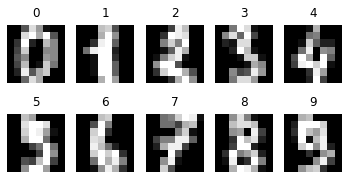

In [ ]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows, ncols,
                         figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow(digits.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(digits.target[k])

4.- Ahora, ajustemos un clasificador de K-vecinos más cercanos a los datos:

In [ ]:
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.25)

In [ ]:
knc = nb.KNeighborsClassifier()

In [ ]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

5.- Evalar la puntuación del clasificador entrenado en el conjunto de datos de prueba:

In [ ]:
knc.score(X_test, y_test)

0.9844444444444445

6.- Ahora, veamos si nuestro clasificador puede reconocer un dígito escrito a mano:

In [ ]:
# Dibujemos un 1, con los pixels
uno = np.zeros((8, 8))
uno[1:-1, 4] = 16  # Los valores de la imagen están en [0, 16].
uno[2, 3] = 16

Text(0.5, 1.0, 'one')

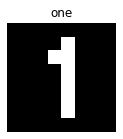

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.imshow(one, interpolation='none',
          cmap=plt.cm.gray)
ax.grid(False)
ax.set_axis_off()
ax.set_title("one")

7.- Predecimos el número dibujado

In [ ]:
knc.predict(one.reshape((1, -1)))

array([1])